In [9]:
from analysis.analysis_facade import AnalysisFacade

facade = AnalysisFacade()
analysis_data = facade.combine_project_data()
random_project_name = 'ACRA.acra'
print(analysis_data[random_project_name])

{'avg_sstubs_per_bucket': 2.1052631578947367, 'avg_total_difftime': 4.947368421052632, 'avg_threshold_difftime': 0.0, 'buckets_amount': 19, 'sstubs_amount': 40, 'shares_of_buckets_with_all_sstubs_in_same_package': 1.0, 'buckets': {'5232075487096810843': {'packages_to_sstub_counts': {'acra-limiter/src/main/java/org/acra/config': 2}, 'max_package_sstubs_share': 1.0, 'timestamps': [datetime.date(2018, 10, 3), datetime.date(2018, 10, 3)], 'overallDiffTime': 0, 'thresholdDiffTime': 0, 'numOfSstubs': 2}, '4561876254608465649': {'packages_to_sstub_counts': {'acra-core/src/main/java/org/acra/builder': 2}, 'max_package_sstubs_share': 1.0, 'timestamps': [datetime.date(2018, 4, 11), datetime.date(2018, 3, 24)], 'overallDiffTime': 18, 'thresholdDiffTime': 0, 'numOfSstubs': 2}, '5073720577013220897': {'packages_to_sstub_counts': {'acra-core/src/main/java/org/acra/config': 2}, 'max_package_sstubs_share': 1.0, 'timestamps': [datetime.date(2018, 4, 11), datetime.date(2018, 3, 24)], 'overallDiffTime': 

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#percentage of buckets with all sstubs in 1 package

In [ ]:
# average thresholdifftime/overallDifftime across projects 

Text(0, 0.5, 'avg_total_difftime')

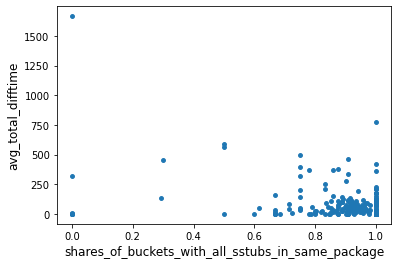

In [11]:
# average avg_total_difftime over shares_of_buckets_with_all_sstubs_in_same_package per project

fig = plt.figure()
ax = plt.gca()

x_array = []
y_array = []

for project_info in analysis_data.values():
    x_array.append(project_info['shares_of_buckets_with_all_sstubs_in_same_package'])
    y_array.append(project_info['avg_total_difftime'])

ax.scatter(x_array, y_array, s=15)
ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('avg_total_difftime', fontsize=12)

Text(0, 0.5, 'avg_threshold_difftime')

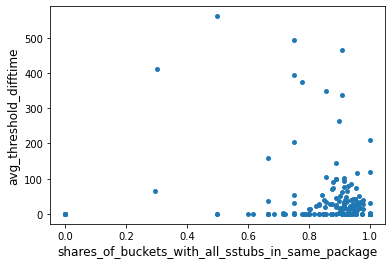

In [10]:
# average thresholdDifftime over shares_of_buckets_with_all_sstubs_in_same_package

fig = plt.figure()
ax = plt.gca()

x_array = []
y_array = []

for project_info in analysis_data.values():
    x_array.append(project_info['shares_of_buckets_with_all_sstubs_in_same_package'])
    y_array.append(project_info['avg_threshold_difftime'])

ax.scatter(x_array, y_array, s=15)
ax.set_xlabel('shares_of_buckets_with_all_sstubs_in_same_package', fontsize=12)
ax.set_ylabel('avg_threshold_difftime', fontsize=12)

<p>the difftime over shares_of_buckets_with_all_sstubs_in_same_package graphs show: </p>
<p>- using the thresholDiffTime rather than total_difftime reduces the difftime values significantly, indicating that many of the very large values >100 days are individual cases rather than systematic occurences within a project. This assumption could be reasoned better if we look at the amount of sstubs or buckets for those projects which still have avg_threshold_difftime >100, and identify if it could be the case that there was a very small total amount of sstubs or buckets within these projects.</p>
<p>- Each dot represents 1 project. There are a few projects that appear to perform significantly worse on one or even on both dimensions. Maybe we can look at them individually and see if they have something particular in common? </p>
<p>- there is no obvious correlation indicating that when sstubs are more often spread across multiple packages, also the time of fixing them takes longer. But maybe this is just not clear now because it is hard to see the distribution of difftimes across any specific package_share value. We should split the shares_of_buckets_with_all_sstubs_in_same_package into intervals, e.g. in 0.05 intervals, and calculate the overall avg difftime across all projects in each interval. Then, maybe we would see a correlation</p>